In [1]:
!pip install numpy matplotlib tensorflow pandas scikit-learn

In [2]:
import tensorflow as tf

In [3]:
import os, sys 
import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
#from keras import layers
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Load and preview the data

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SRHMEM_mct2-0  40000 non-null  float64
 1   SRHMEM_mct2-1  40000 non-null  float64
 2   SRHMEM_mct2-2  40000 non-null  float64
 3   SRLMEM_mct2-0  40000 non-null  float64
 4   SRLMEM_mct2-1  40000 non-null  float64
 5   SRLMEM_mct2-2  40000 non-null  float64
 6   SRMMEM_mct2-0  40000 non-null  float64
 7   SRMMEM_mct2-1  40000 non-null  float64
 8   SRMMEM_mct2-2  40000 non-null  float64
 9   STCREM_cuts-0  40000 non-null  float64
 10  TRHMEM_cuts-0  40000 non-null  float64
 11  TRLMEM_cuts-0  40000 non-null  float64
 12  TRMMEM_cuts-0  40000 non-null  float64
 13  WREM_cuts-0    40000 non-null  float64
 14  nLL_exp_mu0    40000 non-null  float64
 15  nLL_exp_mu1    40000 non-null  float64
 16  nLL_obs_mu0    40000 non-null  float64
 17  nLL_obs_mu1    40000 non-null  float64
dtypes: flo

In [6]:
df.head()

,SRHMEM_mct2-0,SRHMEM_mct2-1,SRHMEM_mct2-2,SRLMEM_mct2-0,SRLMEM_mct2-1,SRLMEM_mct2-2,SRMMEM_mct2-0,SRMMEM_mct2-1,SRMMEM_mct2-2,STCREM_cuts-0,TRHMEM_cuts-0,TRLMEM_cuts-0,TRMMEM_cuts-0,WREM_cuts-0,nLL_exp_mu0,nLL_exp_mu1,nLL_obs_mu0,nLL_obs_mu1
0,7.439603,2.892018,2.307505,25.912380,11.525795,3.063852,14.788095,7.209754,2.362971,173.682251,532.351108,738.565429,422.442789,173.553301,103.286959,116.862277,108.142182,119.386481
1,7.684750,3.698725,1.897097,28.479749,12.257275,4.194841,14.689714,7.719587,1.980634,174.290708,529.037945,749.220906,427.883194,173.146238,103.286959,116.804449,108.142182,118.833050
2,7.943882,3.420123,2.177397,26.754633,13.413325,4.033366,13.137181,7.709774,2.278127,174.876051,524.439945,754.433467,435.512230,173.653161,103.286959,115.775465,108.142182,117.505997
3,7.682058,3.966757,1.688941,28.597147,16.083223,3.932253,13.362300,7.416898,2.146894,174.433917,515.649126,746.518938,437.485171,172.579786,103.286959,117.065549,108.142182,118.534446
4,7.590155,3.854290,2.005759,26.725687,18.089515,4.117549,13.365625,7.424618,1.599003,170.164305,517.685316,746.137959,435.627692,172.978741,103.286959,116.771185,108.142182,118.471346


In [7]:
df.describe()

,SRHMEM_mct2-0,SRHMEM_mct2-1,SRHMEM_mct2-2,SRLMEM_mct2-0,SRLMEM_mct2-1,SRLMEM_mct2-2,SRMMEM_mct2-0,SRMMEM_mct2-1,SRMMEM_mct2-2,STCREM_cuts-0,TRHMEM_cuts-0,TRLMEM_cuts-0,TRMMEM_cuts-0,WREM_cuts-0,nLL_exp_mu0,nLL_exp_mu1,nLL_obs_mu0,nLL_obs_mu1
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04,40000.000000
mean,7.134786,6.508095,3.137761,13.002941,10.562939,8.867702,7.858852,5.411435,2.785879,153.181341,635.033433,663.935479,546.481728,142.509837,1.032870e+02,112.328931,1.081422e+02,112.190781
std,3.242132,3.217723,2.180324,5.433890,6.119287,3.378861,3.874114,2.684277,1.621554,21.234085,87.198108,89.976733,55.523563,20.034172,5.870577e-11,5.589438,2.644673e-11,4.055489
min,1.691488,2.126170,0.000047,4.188176,4.450573,2.726640,3.175045,2.496459,1.330728,116.250000,480.750000,492.750000,370.576521,108.000000,1.032870e+02,104.406657,1.081422e+02,105.117865
25%,4.914412,3.784427,1.661760,8.984766,6.227615,6.356406,4.711679,3.274375,1.691921,136.827754,566.255832,597.583658,507.166693,124.623350,1.032870e+02,108.699149,1.081422e+02,109.570712
50%,6.414172,6.205291,2.650856,12.784019,8.885971,8.595553,6.787655,4.957516,2.295594,151.450775,632.765564,670.213903,547.365486,142.213486,1.032870e+02,110.569543,1.081422e+02,111.179137
75%,8.462586,8.733206,4.048774,16.456375,12.861178,11.084365,10.536407,6.706608,3.164672,169.619167,700.948337,729.787437,587.315362,159.507689,1.032870e+02,114.139071,1.081422e+02,113.569683
max,22.860527,20.173249,13.691866,39.374152,43.557726,21.988963,19.961869,19.763126,10.026629,207.668709,901.181902,932.231020,684.549703,194.239065,1.032870e+02,152.302332,1.081422e+02,147.062487


This data is for the 1909.09226 analysis. First 9 columns contains yields in signal bins, then there are yields in 5 control regions and 4 negative likelihood values: expected with mu=0, expected with mu=1, observed with mu=0, observed with mu=1. 

Let's split data into training, validation and testing samples

In [8]:
train, val, test = np.split(df.sample(frac=1),[int(.8*len(df)), int(.9*len(df))])
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

/Users/rafalmaselek/miniconda3/envs/likelihood-tutorial/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
columns = train.columns
std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(train.iloc[:, :-4].to_numpy())
mean_arr = std_scaler.mean_ 
std_arr = np.sqrt(std_scaler.var_)
train_scaled = pd.DataFrame(train_scaled, columns=columns[:-4])
val_scaled = std_scaler.transform(val.iloc[:, :-4].to_numpy())
val_scaled = pd.DataFrame(val_scaled, columns=columns[:-4])
test_scaled = std_scaler.transform(test.iloc[:, :-4].to_numpy())
test_scaled = pd.DataFrame(test_scaled, columns=columns[:-4])


for col in columns[-4:]:
    train_scaled.loc[:, col] = train.loc[:, col]
    test_scaled.loc[:, col] = test.loc[:, col]
    val_scaled.loc[:, col] = val.loc[:, col]


# Building model

In [10]:
def get_model(inputs, neurons = 256, blocks=4, l2=1e-3):
    input_layer = keras.Input(shape=(inputs,))
    xx = input_layer
    for ii in range(blocks):
        xx = keras.layers.Dense(neurons, activation=None, kernel_regularizer=keras.regularizers.L2(l2))(xx)
        xx = keras.layers.BatchNormalization()(xx)
        xx = keras.layers.Activation(tf.nn.relu)(xx)
    xx = keras.layers.Dense(4, activation="ReLU",)(xx)
    model = keras.Model(input_layer, xx) 
    return model

In [11]:
model = get_model(len(columns)-4, 32, 3, 1e-3)

In [12]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), metrics=['mae','mape'])

In [13]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 32)                480       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                             

# Train model

In [14]:
history = model.fit(
            train_scaled.iloc[:,:-4], train_scaled.iloc[:, -4:],
            batch_size=250, epochs=50, 
            validation_data=[val_scaled.iloc[:,:-4], val_scaled.iloc[:, -4:]]
                 )

Epoch 1/50


2024-02-26 15:35:20.851435: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


128/128 [==============================] - 0s 1ms/step - loss: 11801.0059 - mae: 108.5147 - mape: 99.5676 - val_loss: 11843.0254 - val_mae: 108.7100 - val_mape: 99.7240
Epoch 2/50
128/128 [==============================] - 0s 786us/step - loss: 11748.9746 - mae: 108.2736 - mape: 99.3463 - val_loss: 11756.7676 - val_mae: 108.3113 - val_mape: 99.3584
Epoch 3/50
128/128 [==============================] - 0s 770us/step - loss: 11692.7686 - mae: 108.0128 - mape: 99.1071 - val_loss: 11675.0371 - val_mae: 107.9300 - val_mape: 99.0078
Epoch 4/50
128/128 [==============================] - 0s 772us/step - loss: 11635.6748 - mae: 107.7467 - mape: 98.8631 - val_loss: 11611.0342 - val_mae: 107.6306 - val_mape: 98.7329
Epoch 5/50
128/128 [==============================] - 0s 766us/step - loss: 11578.0664 - mae: 107.4779 - mape: 98.6167 - val_loss: 11554.5635 - val_mae: 107.3666 - val_mape: 98.4910
Epoch 6/50
128/128 [==============================] - 0s 770us/step - loss: 11518.6025 - mae: 107.1997 

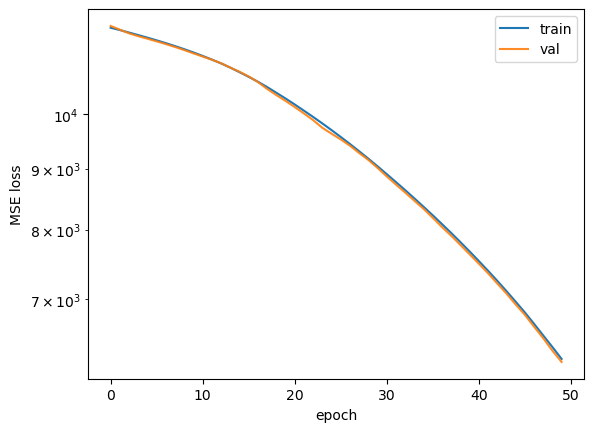

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val', alpha=0.9)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

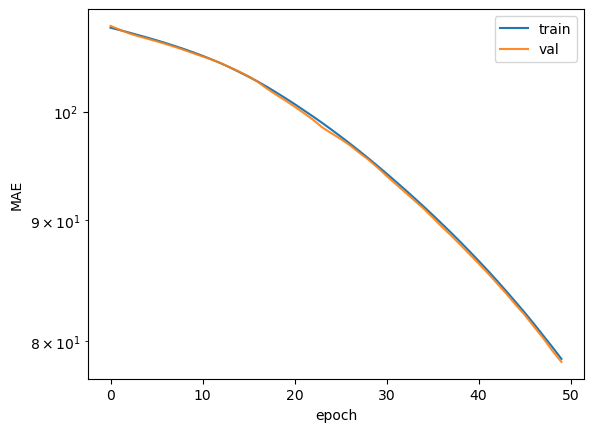

In [16]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val', alpha=0.9)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

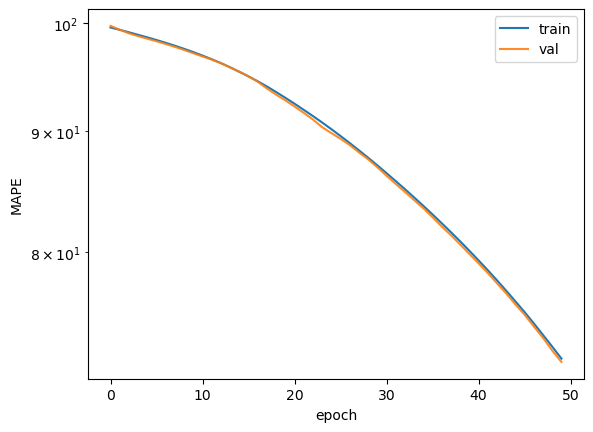

In [17]:
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='val', alpha=0.9)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

In [18]:
model.evaluate(test_scaled.iloc[:, :-4], test_scaled.iloc[:, -4:], batch_size=128)

32/32 [==============================] - 0s 444us/step - loss: 6164.5679 - mae: 78.1376 - mape: 71.6914


[6164.56787109375, 78.13760375976562, 71.69136810302734]

In [19]:
y_true = test_scaled.iloc[:, -4:]
y_pred = model.predict(test_scaled.iloc[:, :-4])
mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

125/125 [==============================] - 0s 314us/step


In [20]:
print(y_true.shape, y_pred.shape, mape.shape)

(4000, 4) (4000, 4) (4000,)


In [21]:
y_true

,nLL_exp_mu0,nLL_exp_mu1,nLL_obs_mu0,nLL_obs_mu1
0,103.286959,112.297498,108.142182,113.511253
1,103.286959,112.979870,108.142182,110.009879
2,103.286959,119.537417,108.142182,115.282384
3,103.286959,128.156328,108.142182,120.729809
4,103.286959,121.141994,108.142182,116.313828
...,...,...,...,...
3995,103.286959,123.547732,108.142182,118.736837
3996,103.286959,112.402443,108.142182,113.475077
3997,103.286959,108.335818,108.142182,108.015937
3998,103.286959,110.726653,108.142182,111.587764


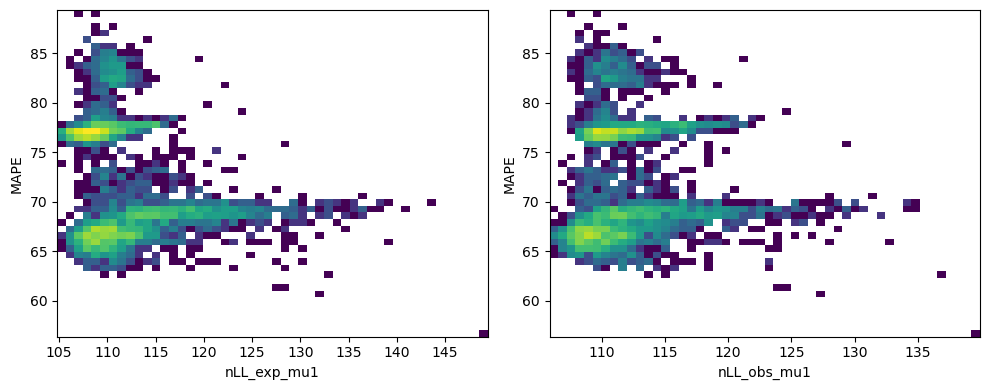

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
for ll in range(2):
    axs[ll].hist2d(y_true.iloc[:, ll*2+1], mape,  50, norm=mpl.colors.LogNorm(vmin=1, vmax=1e2))
    axs[ll].set_xlabel(columns[14+ll*2+1])
    axs[ll].set_ylabel('MAPE')
plt.tight_layout()
plt.show()

# Exercises

* Experiment with neural network hyperparameters to improve MAPE results
* Make 2D histograms of -2*log[ L_mu1/Lm_u0] for both expected and observed